# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 950)
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

import pydotplus
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import xgboost as xgb
import math
from IPython.display import HTML
from tabulate import tabulate

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor


import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

C:\Users\JST\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\JST\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# 1.Viðskipti á markaði

Text(0, 0.5, 'Prósenta á markað')

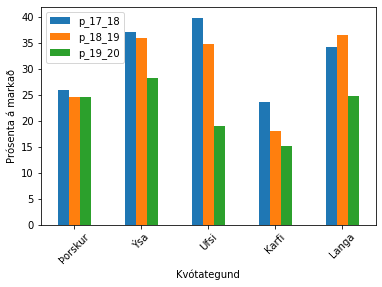

In [2]:
xl = pd.ExcelFile("R:\\Ráðgjöf\\Brim\\Yfirlit_uthlutun_1920.xlsx")
df_uthlutun = xl.parse('Úthlutun snyrt') 
df_uthlutun


df_uthlutun['p_17_18']=df_uthlutun['m_17_18']/df_uthlutun['Óslægt_17_18']/10
df_uthlutun['p_18_19']=df_uthlutun['m_18_19']/df_uthlutun['Óslægt_18_19']/10
df_uthlutun['p_19_20']=df_uthlutun['m_19_20']/df_uthlutun['Óslægt_19-20']/10


df_uthlutun.head(5).plot(x="Kvótategund",y=['p_17_18','p_18_19','p_19_20'], kind='bar')

plt.xticks(rotation=45) 
plt.ylabel('Prósenta á markað')



Text(0, 0.5, 'Prósenta á milli óskyldra aðila')

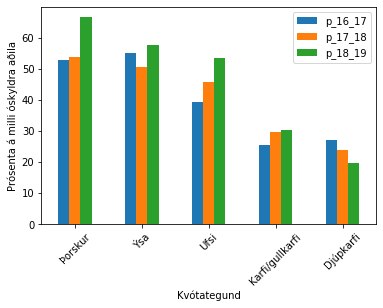

In [3]:
xl = pd.ExcelFile("R:\\Ráðgjöf\\Brim\\toflur_og_talnagogn_2018_2019.xlsx")
df_flutningur = xl.parse('Flutningur_aflamarks_1819') 


df_flutningur['p_18_19']=df_flutningur['m_18_19']/df_flutningur['f_s_18_19']*100
df_flutningur['p_17_18']=df_flutningur['m_17_18']/df_flutningur['f_s_17_18']*100
df_flutningur['p_16_17']=df_flutningur['m_16_17']/df_flutningur['f_s_16_17']*100


df_flutningur.head(5).plot(x="Kvótategund",y=['p_16_17','p_17_18','p_18_19'], kind='bar')


plt.xticks(rotation=45) 
plt.ylabel('Prósenta á milli óskyldra aðila')

## HHI útreikningar

In [4]:
pd.options.display.float_format = '{:,.0f}'.format
xl = pd.ExcelFile("R:\\Ráðgjöf\\Brim\\\Samthjoppun_1920.xlsx")
df_matvara = xl.parse('matvara') 
df_matvara.iloc[:,4:8]

print(tabulate(df_matvara.iloc[:,4:10].head(7), 
               showindex=False, 
               headers=df_matvara.iloc[:,4:10].columns,
               tablefmt="plain",
              floatfmt=".1f"))


Eigandi eftir samruna      Velta 2019    Hlutdeild    HHI.1
Hagar                         80483.0         47.2   2225.3
Festi                         42263.0         24.8    613.6
Samkaup                       34000.0         19.9    397.1
Skeljungur                     3865.0          2.3      5.1
Costco                         7000.0          4.1     16.8
Aðrir                          3000.0          1.8      3.1
Samtals                      170611.0        100.0   3261.2


In [5]:
xl = pd.ExcelFile("R:\\Ráðgjöf\\Brim\\\Samthjoppun_1920.xlsx")
df_bankar = xl.parse('bankar') 


print(tabulate(df_bankar.head(7), 
               showindex=False, 
               headers=df_bankar.columns,
               tablefmt="plain",
              floatfmt=".1f"))


Banki           Heild %    Innlán %    HHI heild    HHI innlán
Landsbanki           34          35         1156          1225
Íslandsbanki         32          34         1024          1156
Arionbanki           28          27          784           729
Kvika                 3           4            9            16
Aðrir                 3           0            9             0
Samtals             100         100         2982          3126


In [6]:

pd.options.display.float_format = '{:,.1f}'.format


xl = pd.ExcelFile("R:\\Ráðgjöf\\Brim\\Samthjoppun_1920_Huginn.xlsx")
df_fyrir = xl.parse('SÞ_fyrir') 
df_eftir = xl.parse('SÞ_eftir') 
df_eftir_kmb_grb = xl.parse('SÞ__eftir_kmb_grb') 
df_eftir_Hugin = xl.parse('SÞ__eftir_Hugin') 
df_hámörk = xl.parse('Hámörk')



In [7]:
df_fyrir = df_fyrir.drop(["Röð"],axis=1)
df_fyrir = df_fyrir.drop("Samtals 434317446",axis=1)

df_eftir = df_eftir.drop(["Röð"],axis=1)
df_eftir = df_eftir.drop("Samtals 434317446",axis=1)

df_eftir_kmb_grb = df_eftir_kmb_grb.drop(["Röð"],axis=1)
df_eftir_kmb_grb = df_eftir_kmb_grb.drop("Samtals 434317446",axis=1)

df_eftir_Hugin = df_eftir_Hugin.drop(["Röð"],axis=1)
df_eftir_Hugin = df_eftir_Hugin.drop("Samtals 434317446",axis=1)


df_fyrir.rename(columns = {'Hlutfall  %':'ÞÍG'}, inplace = True)
df_eftir.rename(columns = {'Hlutfall  %':'ÞÍG'}, inplace = True)
df_eftir_kmb_grb.rename(columns = {'Hlutfall  %':'ÞÍG'}, inplace = True)
df_eftir_Hugin.rename(columns = {'Hlutfall  %':'ÞÍG'}, inplace = True)



In [8]:
fiskar=list(df_fyrir.columns)

fiskar.remove('Eigandi')
fiskar.remove('ÞÍG')


In [9]:
HHI_fyrir=df_fyrir.ÞÍG.multiply(100).pow(2).sum()
HHI_eftir=df_eftir.ÞÍG.multiply(100).pow(2).sum()
HHI_eftir_kmb_grb=df_eftir_kmb_grb.ÞÍG.multiply(100).pow(2).sum()
HHI_eftir_Hugin=df_eftir_Hugin.ÞÍG.multiply(100).pow(2).sum()


HHI_mismunur=HHI_eftir - HHI_fyrir
HHI_mismunur_kmb_grb =HHI_eftir_kmb_grb-HHI_eftir
HHI_mismunur_Hugin =HHI_eftir_Hugin-HHI_eftir_kmb_grb

CR4_fyrir = df_fyrir.ÞÍG.multiply(100).head(3).sum()
CR4_eftir = df_eftir.ÞÍG.multiply(100).head(3).sum()

print("HHI fyrir þorskígildistonn fyrir 8.september 2019:","%.1f" % HHI_fyrir)
print("HHI fyrir þorskígildistonn eftir 8.september 2019:","%.1f" % HHI_eftir)
print("Hækkun á HHI fyrir þorskígildistonn fyrir og eftir 8.september 2019:","%.1f" % HHI_mismunur)

print("HHI fyrir þorskígildistonn fyrir kaup á Kambi og Grábrók:","%.1f" % HHI_eftir)
print("HHI fyrir þorskígildistonn eftir 8.september 2019:","%.1f" % HHI_eftir_kmb_grb)
print("Hækkun á HHI fyrir þorskígildistonn fyrir og eftir 8.september 2019:","%.1f" % HHI_mismunur_kmb_grb)

#Töflur búnar til fyrir skýrslu:
t_fyrir=df_fyrir
t_fyrir['ÞÍG']=df_fyrir.ÞÍG.multiply(100)
t_fyrir['HHI']=df_fyrir.ÞÍG.pow(2)
t_fyrir = t_fyrir.drop(t_fyrir.iloc[:,2:32], axis=1)
t_fyrir.head(4)

t_eftir=df_eftir
t_eftir['ÞÍG']=df_eftir.ÞÍG.multiply(100)
t_eftir['HHI']=df_eftir.ÞÍG.pow(2)
t_eftir = t_eftir.drop(t_eftir.iloc[:,2:32], axis=1)
t_eftir.head(8)

t_eftir_kmb_grb=df_eftir_kmb_grb
t_eftir_kmb_grb['ÞÍG']=df_eftir_kmb_grb.ÞÍG.multiply(100)
t_eftir_kmb_grb['HHI']=df_eftir_kmb_grb.ÞÍG.pow(2)
t_eftir_kmb_grb = t_eftir_kmb_grb.drop(t_eftir_kmb_grb.iloc[:,2:32], axis=1)
t_eftir_kmb_grb.head(8)


t_saman = pd.concat([t_fyrir, t_eftir,t_eftir_kmb_grb], axis=1)

t_saman.columns=['Eigandi fyrir','ÞÍG (%)','Framlag til HHI','Eigandi eftir', 'ÞÍG (%)','Framlag til HHI','Eigandi','ÞÍG eftir_kmb_grb','HHI eftir_kmb_grb']

t_saman.head(8)


HHI fyrir þorskígildistonn fyrir 8.september 2019: 478.6
HHI fyrir þorskígildistonn eftir 8.september 2019: 604.5
Hækkun á HHI fyrir þorskígildistonn fyrir og eftir 8.september 2019: 125.9
HHI fyrir þorskígildistonn fyrir kaup á Kambi og Grábrók: 604.5
HHI fyrir þorskígildistonn eftir 8.september 2019: 627.4
Hækkun á HHI fyrir þorskígildistonn fyrir og eftir 8.september 2019: 23.0


,Eigandi fyrir,ÞÍG (%),Framlag til HHI,Eigandi eftir,ÞÍG (%),Framlag til HHI,Eigandi,ÞÍG eftir_kmb_grb,HHI eftir_kmb_grb
0,Brim + ÖV,11.8,138.2,Brim + ÖV+ÚR+KG,16.8,280.9,Brim + ÖV+ÚR+KG+KB+GB,17.4,304.1
1,Samherji+ Sæból+ÚA,9.1,82.3,Samherji+ Sæból+ÚA,9.1,82.3,Samherji+ Sæból+ÚA,9.1,82.3
2,FISK + SC,5.6,30.9,FISK + SC,5.6,30.9,FISK + SC,5.6,30.9
3,Síldarvinnslan + BH +RH,8.1,65.9,Síldarvinnslan + BH +RH,8.1,65.9,Síldarvinnslan + BH +RH,8.1,65.9
4,Vinnslustöðin hf.,5.0,25.3,Vinnslustöðin hf.,5.0,25.3,Vinnslustöðin hf.,5.0,25.3
5,Þorbjörn hf.,4.8,23.1,Þorbjörn hf.,4.8,23.1,Þorbjörn hf.,4.8,23.1
6,Skinney-Þinganes hf.,4.2,17.8,Skinney-Þinganes hf.,4.2,17.8,Skinney-Þinganes hf.,4.2,17.8
7,Útgerðarfélag Reykjavíkur hf.,4.0,15.7,Ísfélag Vestmannaeyja hf.,3.8,14.4,Ísfélag Vestmannaeyja hf.,3.8,14.4


In [10]:
HHI_listi=[]

for fiskur in fiskar:

    df_fyrir=df_fyrir.sort_values(by=[fiskur],ascending=False)
    df_eftir=df_eftir.sort_values(by=[fiskur],ascending=False)
    
    cr4_fyrir=df_fyrir[fiskur].head(3).sum()
    cr4_eftir=df_eftir[fiskur].head(3).sum()
    cr4_mismunur=cr4_eftir-cr4_fyrir
    
    cr8_fyrir=df_fyrir[fiskur].head(7).sum()
    cr8_eftir=df_eftir[fiskur].head(7).sum()
    cr8_mismunur=cr8_eftir-cr8_fyrir
    
    
    HHI_fyrir=df_fyrir[fiskur].pow(2).sum()
    HHI_eftir=df_eftir[fiskur].pow(2).sum()
    
    

    HHI_mismunur=HHI_eftir - HHI_fyrir
    HHI_mismunur
    HHI_listi.append( [HHI_fyrir, HHI_eftir, HHI_mismunur,
                      cr8_fyrir,cr8_eftir,cr8_mismunur]) 
    
df4 = pd.DataFrame(HHI_listi, columns = ['HHI_fyrir', 'HHI_eftir', 'HHI breyting',
                                         'cr8_fyrir','cr8_eftir', 'cr8 breyting'],index=fiskar)

df4.drop(["Þorskur","Ýsa","Ufsi","Gullkarfi","Grálúða","Skrápflúra","Hlýri", "Sandkoli", "Skötuselur", "Blálanga","Litli karfi","Úthafskarfi",\
          "Langlúra","Þykkvalúra", "Keila", "Langa","Skarkoli","Steinbítur","Úthafsrækja", "Rækja við Snæf.nes",\
         "Arnarfj.rækja","Rækja í Djúpi", "Humar","Gulllax","Djúpkarfi"],axis=0, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
print(tabulate(df4.head(7),  
               headers=df4.columns,
               tablefmt="plain",
              floatfmt=".1f"))







            HHI_fyrir    HHI_eftir    HHI breyting    cr8_fyrir    cr8_eftir    cr8 breyting
Síld           1374.8       1433.9            59.1         95.6         97.8             2.2
Loðna          1423.7       1456.3            32.6         93.5         94.9             1.4
Kolmunni       2018.3       2067.1            48.8         96.1         99.2             3.1
Makríll        1054.8       1402.0           347.2         81.0         91.0            10.0
NÍ-síld        1472.3       1588.6           116.2         95.1         99.6             4.6


In [11]:
HHI_listi=[]

for fiskur in fiskar:

    df_eftir_kmb_grb=df_eftir_kmb_grb.sort_values(by=[fiskur],ascending=False)
    df_eftir_Hugin=df_eftir_Hugin.sort_values(by=[fiskur],ascending=False)
    
    cr4_eftir_kmb_grb=df_eftir_kmb_grb[fiskur].head(3).sum()
    cr4_eftir_Hugin=df_eftir_Hugin[fiskur].head(3).sum()
    cr4_mismunur=cr4_eftir_Hugin-cr4_eftir_kmb_grb
    
    cr8_eftir_kmb_grb=df_eftir_kmb_grb[fiskur].head(7).sum()
    cr8_eftir_Hugin=df_eftir_Hugin[fiskur].head(7).sum()
    cr8_mismunur=cr8_eftir_Hugin-cr8_eftir_kmb_grb
    
    
    HHI_eftir_kmb_grb=df_eftir_kmb_grb[fiskur].pow(2).sum()
    HHI_eftir_Hugin=df_eftir_Hugin[fiskur].pow(2).sum()
    
    

    HHI_mismunur=HHI_eftir_Hugin - HHI_eftir_kmb_grb
    HHI_mismunur
    HHI_listi.append( [HHI_eftir_kmb_grb, HHI_eftir_Hugin, HHI_mismunur,
                      cr8_eftir_kmb_grb,cr8_eftir_Hugin,cr8_mismunur]) 
    
df4 = pd.DataFrame(HHI_listi, columns = ['HHI fyrir Hugin', 'HHI eftir Hugin', 'HHI breyting',
                                         'cr8 fyrir Hugin','cr8 eftir Hugin', 'cr8 breyting'],index=fiskar)

df4.drop(["Þorskur","Ýsa","Ufsi","Gullkarfi","Grálúða","Skrápflúra","Hlýri", "Sandkoli", "Skötuselur", "Blálanga","Litli karfi","Úthafskarfi",\
          "Langlúra","Þykkvalúra", "Keila", "Langa","Skarkoli","Steinbítur","Úthafsrækja", "Rækja við Snæf.nes",\
         "Arnarfj.rækja","Rækja í Djúpi", "Humar","Gulllax","Djúpkarfi"],axis=0, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
print(tabulate(df4.head(7),  
               headers=df4.columns,
               tablefmt="plain",
              floatfmt=".1f"))


            HHI fyrir Hugin    HHI eftir Hugin    HHI breyting    cr8 fyrir Hugin    cr8 eftir Hugin    cr8 breyting
Síld                 1374.8             1433.4            58.5               95.6               97.8             2.2
Loðna                1423.7             1456.3            32.6               93.5               94.9             1.4
Kolmunni             2018.3             2066.9            48.6               96.1               99.2             3.1
Makríll              1154.8             1403.8           249.0               84.4               91.0             6.6
NÍ-síld              1472.3             1591.3           118.9               95.1               99.7             4.7


# Aðfallslíkön

# Gögn undirbúin fyrir regression

In [21]:
xl = pd.ExcelFile("R:\\Ráðgjöf\\Brim\\fish_prices.xlsx")
df_fish_prices = xl.parse('Þorskur') 

#df_fish_prices.sort_values('viðskiptaverð_isk',inplace=True)

df_fish_prices.reset_index(inplace=True, drop=True)

X=df_fish_prices.loc[:,'erlent_verð_isk':'olíuverð_isk']
Y=df_fish_prices['viðskiptaverð_isk']




# Verðdreifni

In [22]:
print(Y[0:11].mad()/Y[0:11].mean())
print(Y[24:35].mad()/Y[24:35].mean())
print(Y[36:43].mad()/Y[36:43].mean())

Y[36:43]


0.042072748575384775
0.0732689467312742
0.053639821823890516


36   230
37   247
38   229
39   261
40   267
41   251
42   272
Name: viðskiptaverð_isk, dtype: float64

# Running Models

## XGB regression

In [14]:
stop

#reiknað með regressor
seed = 2
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=test_size,
                                                    random_state=seed,
                                                    shuffle=True)

# DMatrices

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Building a baseline model
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

params = {
    # Parameters that we are going to tune.
    'max_depth': 8,
    'min_child_weight': 3,
    'eta': 0.05,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    # Other parameters
    'objective': 'reg:squarederror',
    'eval_metric': "mae"
}

xgb_regressor = xgb.train(params,
                          dtrain,
                          num_boost_round=2000,
                          evals=[(dtest, "Test")],
                          verbose_eval=200)

y_pred = xgb_regressor.predict(dtest)

NameError: name 'stop' is not defined

In [ ]:
print("mae  : %.2f" % mean_absolute_error(y_test, y_pred))
print("r2   : %.2f" % r2_score(y_test, y_pred))
print("evs  : %.2f" % explained_variance_score(y_test, y_pred))

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="raunverð")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="spáverð")
plt.grid(True)
plt.legend()
plt.show()

x_ax

In [ ]:
xgb.plot_importance(xgb_regressor,
                    importance_type='total_gain',
                    show_values=False,
                    title='Mikilvægi þátta',
                    ylabel='þættir',
                    xlabel='einkunn')
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(xgb_regressor)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type='bar')

shap.dependence_plot('olíuverð_isk', shap_values, X_train)

shap.force_plot(explainer.expected_value, shap_values, X_train)

In [ ]:
cols = [
    'viðskiptaverð_isk',
    'mánuðir_eftir',
    'erlent_verð_isk',
    'olíuverð_isk',
]

scatterplotmatrix(df_fish_prices[cols].values,
                  figsize=(10, 8),
                  names=cols,
                  alpha=0.5)
plt.tight_layout()
#plt.savefig('images/10_03.png', dpi=300)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=10,
                               criterion='mse',
                               random_state=1,
                               n_jobs=-1)
forest.fit(X_train, y_train)

In [ ]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(
    y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

# Línuleg aðfallsgreining

In [ ]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X, Y)
reg2.fit(X, Y)
reg3.fit(X, Y)

ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(X, Y)

In [ ]:
xt = X[:42]
yt = Y[:42]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)


In [ ]:
plt.figure()

plt.plot(pred1, 'g*', label='GB spá')
plt.plot(yt, 'b', label='Rauntölur')
plt.plot(pred2, 'b^', label='Slembiskógar spá')
plt.plot(pred3, 'ys', label='Línuleg aðfallsgreining spá')
plt.plot(pred4, 'r*', ms=10, label='Meðaltöl spánna')

plt.tick_params(axis='x',
                which='both',
                bottom=False,
                top=False,
                labelbottom=False)
plt.ylabel('Verð sem líkönin spá fyrir leigu á aflahlutdeild')
plt.xlabel('gögn úr þýði í stærðarröð')
plt.legend(loc="best")
plt.title('Spár ýmissa líkana og meðaltöl þeirra')

plt.show()

In [ ]:
X=pd.concat([np.log(X.erlent_verð_isk),X.mánuðir_eftir, np.log(X.olíuverð_isk) ], axis=1)
Y=np.log(Y)


In [ ]:
pd.options.display.float_format = '{:,.3f}'.format


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=.2,
                                                    random_state=2)

from sklearn import datasets, linear_model
from sklearn.linear_model import RANSACRegressor

# Create linear regression object
regr = linear_model.LinearRegression()
regr = RANSACRegressor(random_state=0).fit(X, Y)

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients

regr.score(X, Y)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

In [ ]:
import statsmodels.api as sm

# Fit regression model
results = sm.OLS(Y, X).fit()

results.summary()

# Markaðshlutdeild á erlendum mörkuðum

In [ ]:
from matplotlib.ticker import FormatStrFormatter
xl = pd.ExcelFile("R:\\Ráðgjöf\\Brim\\global_market_share.xlsx")
df_market_share = xl.parse('Ufsi')


ax=df_market_share.sort_values('Europe').plot(kind='barh',
                                              x='Flokkur',
                                              y=['Ísland','Önnur Evrópulönd'],
                                              fontsize=12,
                                              stacked=True)
pd.options.display.float_format = '{:,}'.format
ax.set_xlabel("Lestir")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xticks(rotation=45) 

